In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [12]:
def lorenz(x, t, F):
    '''Partial derivatives for Lorenz-96 ODE.'''
    p = len(x)
    dxdt = np.zeros(p)
    for i in range(p):
        dxdt[i] = (x[(i+1) % p] - x[(i-2) % p]) * x[(i-1) % p] - x[i] + F

    return dxdt

In [2]:
def simulate_lorenz_96(p, T, F=10.0, delta_t=0.1, sd=0.1, burn_in=1000,
                       seed=0):
    if seed is not None:
        np.random.seed(seed)

    # Use scipy to solve ODE.
    x0 = np.random.normal(scale=0.01, size=p)
    t = np.linspace(0, (T + burn_in) * delta_t, T + burn_in)
    X = odeint(lorenz, x0, t, args=(F,))
    X += np.random.normal(scale=sd, size=(T + burn_in, p))

    # Set up Granger causality ground truth.
    GC = np.zeros((p, p), dtype=int)
    for i in range(p):
        GC[i, i] = 1
        GC[i, (i + 1) % p] = 1
        GC[i, (i - 1) % p] = 1
        GC[i, (i - 2) % p] = 1

    return X[burn_in:], GC


In [36]:
p = 10
T = 1000
dt = 2
F = 10.0
delta_t = 0.1
sd = 0.1
burn_in = 100
seed = 0
x0 = np.random.normal(scale=0.01, size=p)
t = np.linspace(0, (dt + burn_in) * delta_t, dt + burn_in)
X_np = np.zeros([T,p])

E:\Users\Administrator\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


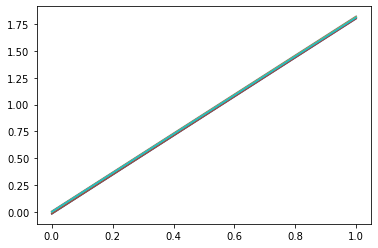

In [45]:
X = odeint(lorenz, x0, t, args=(F,))
plt.plot(X)
X_np[0] = X[-1]
delta_t = np.linspace(0.1,1.9,T)
for i in range(1,T):
    t = np.linspace(0, (dt) * delta_t[i], dt)
    X_np[i] = odeint(lorenz, X_np[i-1], t, args=(F,))[-1]

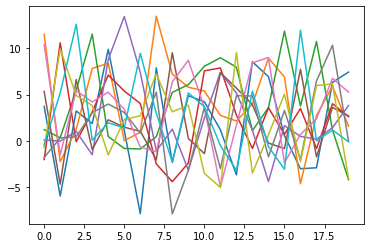

In [48]:
plt.plot(X_np[490:510])